# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [10]:
df.shape

(1898, 9)

#### Observations:
1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Above we see that rating is string, meaning that just being the order isn't null doesn't mean there was a rating.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There aren't any missing values, however, there are orders that were not rated.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [13]:
# Printing statistical summary of the DataFrame
print(df.describe())

# Calculating and printing min, avg, and max food preparation time
print("\nFood Preparation Time:")
print("Minimum:", df['food_preparation_time'].min())
print("Average:", df['food_preparation_time'].mean())
print("Maximum:", df['food_preparation_time'].max())


           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  

Food Preparation Time:
Minimum: 20
Average: 27.371970495258168
Maximum:

### **Question 5:** How many orders are not rated?

In [18]:
type('rating')

str

In [21]:
#Filtering for the string "not given"
not_given_ratings = df[df['rating'] == 'Not given'].shape[0]
print("Number of orders with 'Not given' rating:", not_given_ratings)


Number of orders with 'Not given' rating: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

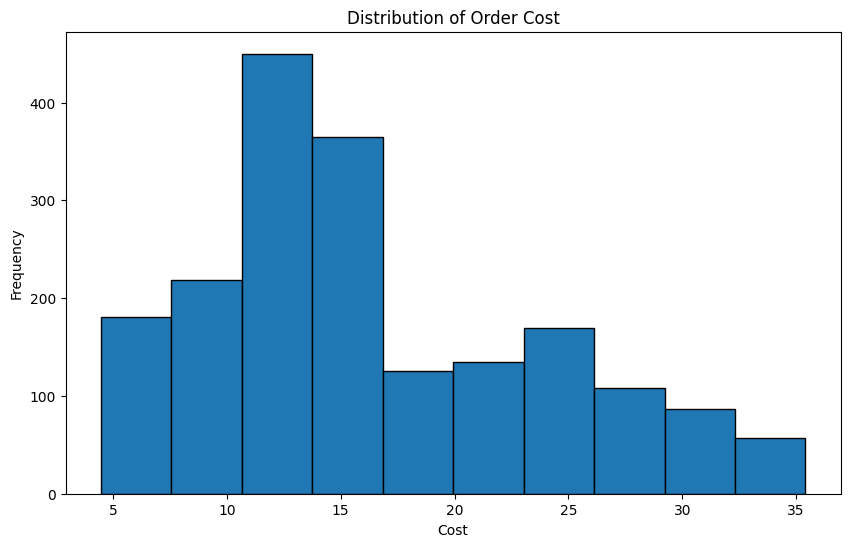

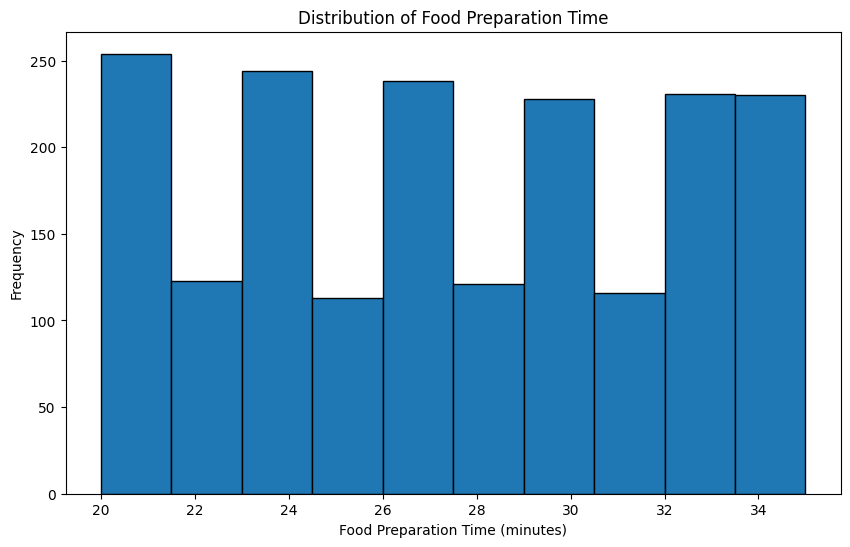

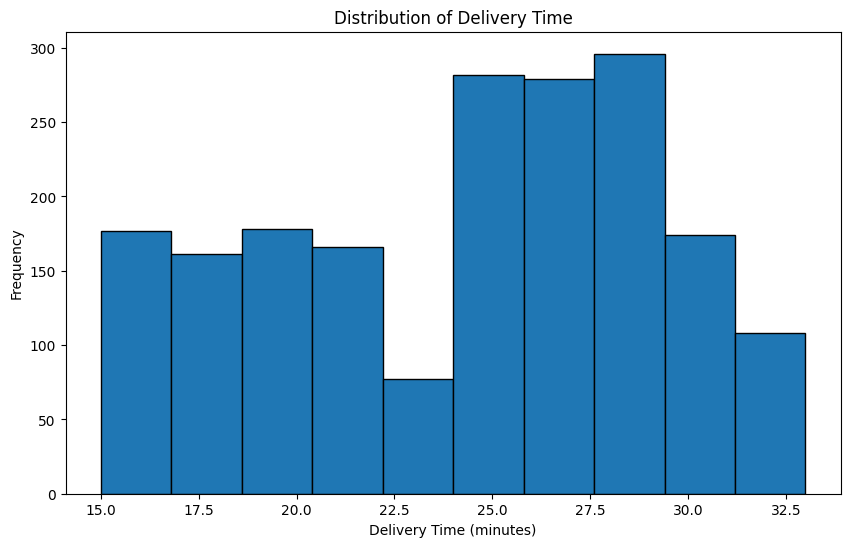

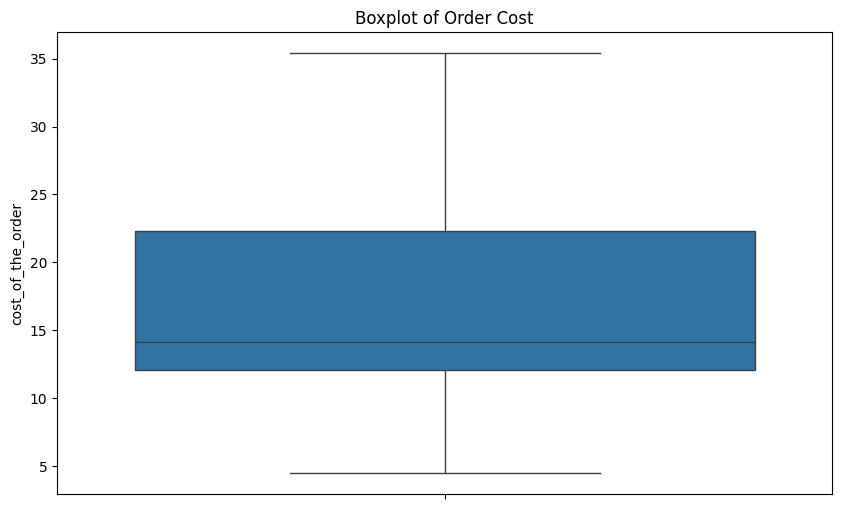

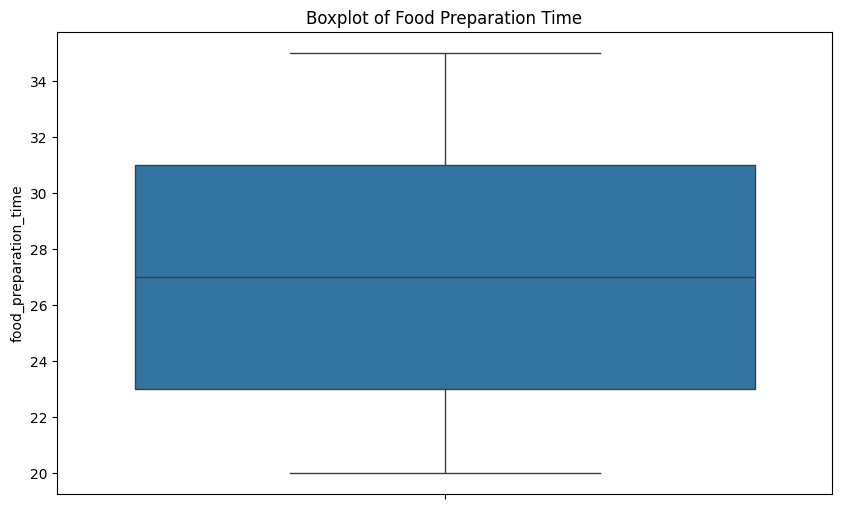

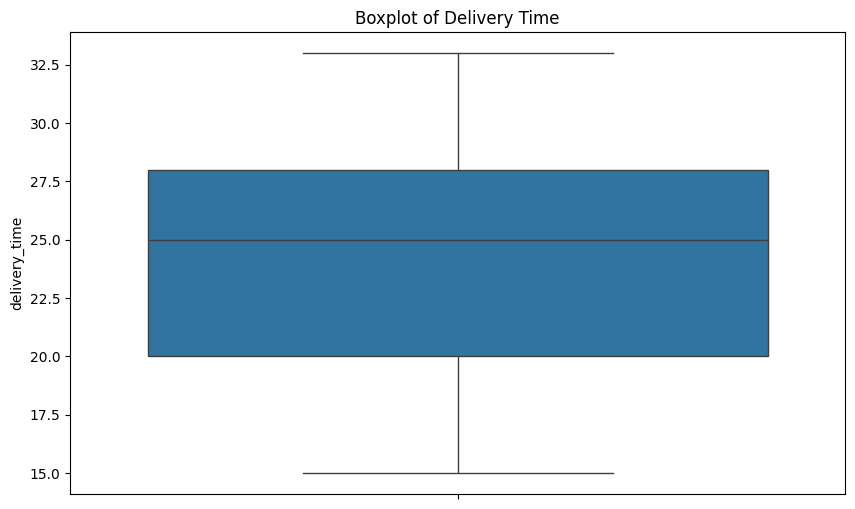

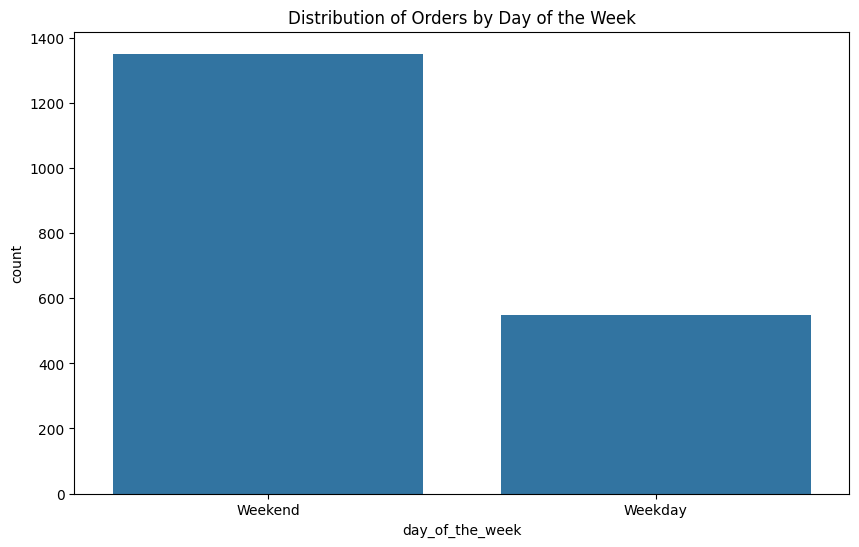

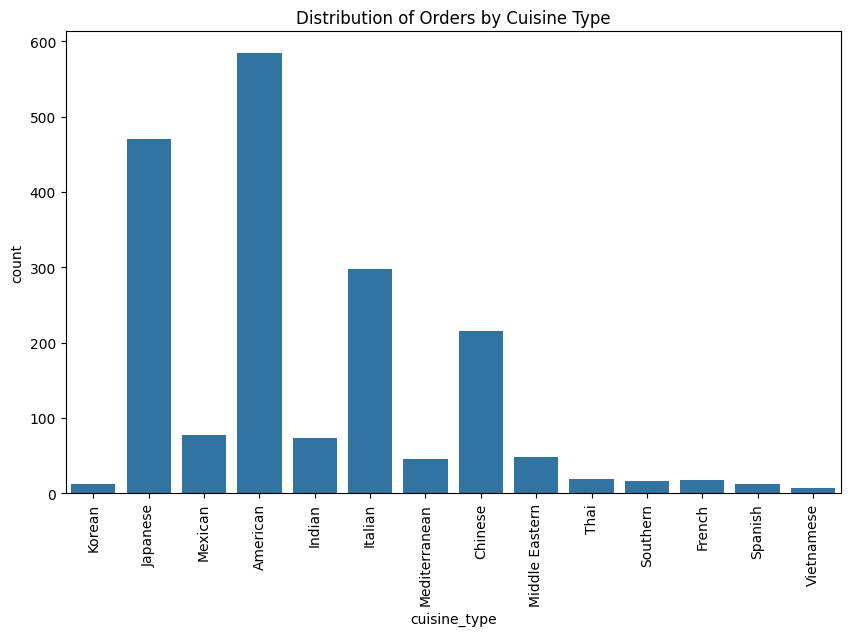

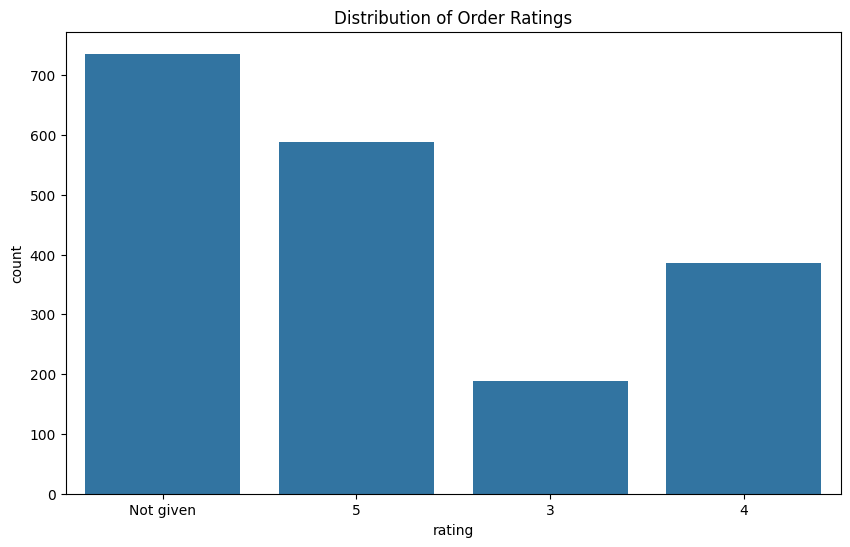

In [17]:
import matplotlib.pyplot as plt
#Plotting histograms for numerical variables
plt.figure(figsize=(10, 6))
plt.hist(df['cost_of_the_order'], bins=10, edgecolor='black')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Order Cost')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['food_preparation_time'], bins=10, edgecolor='black')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Food Preparation Time')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['delivery_time'], bins=10, edgecolor='black')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()


#Plotting boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['cost_of_the_order'])
plt.title('Boxplot of Order Cost')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.show()

#Plotting countplots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x=df['day_of_the_week'])
plt.title('Distribution of Orders by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['cuisine_type'])
plt.xticks(rotation=90)
plt.title('Distribution of Orders by Cuisine Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['rating'])
plt.title('Distribution of Order Ratings')
plt.show()

Most people either don't give their orders a rating or give their order a 5 star rating, meaning people are mostly happy with their orders. Most people order American or Japanese cuisine and they order on the weekends more than not. Delivery time is about 25 minutes with the min being 20 and max being 27.5 minutes. Prep time is about 27 minutes. Cost of the order is on average $15. This can help us with our business strategy. How can we reduce our prep time? Perhaps, we need to hire more people during the weekend to deliver orders, or we need to add more American or Japanese restaurants as there is a demand for it.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [22]:
#Grouping the data by restaurant name and counting the number of orders
restaurant_order_counts = df.groupby('restaurant_name')['order_id'].count()

#Sorting the restaurants by the number of orders in descending order
top_5_restaurants = restaurant_order_counts.sort_values(ascending=False).head(5)

#Printing the top 5 restaurants
top_5_restaurants


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### **Question 8**: Which is the most popular cuisine on weekends?

In [23]:
#Filtering the DataFrame for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

#Counting the occurrences of each cuisine type on weekends
cuisine_counts_weekend = weekend_orders['cuisine_type'].value_counts()

#Getting the most popular cuisine
most_popular_cuisine_weekend = cuisine_counts_weekend.index[0]

#Printing the result
print("The most popular cuisine on weekends is:", most_popular_cuisine_weekend)


The most popular cuisine on weekends is: American


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [24]:
# Calculating the number of orders with a cost greater than $20
orders_over_20 = len(df[df['cost_of_the_order'] > 20])

# Calculating the total number of orders
total_orders = len(df)

# Calculating the percentage of orders over $20
percentage_over_20 = (orders_over_20 / total_orders) * 100

# Printing the result
print(f"{percentage_over_20:.2f}% of the orders cost more than $20.")


29.24% of the orders cost more than $20.


### **Question 10**: What is the mean order delivery time?

In [25]:
#Calculating the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

#Printing the result
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [26]:
#Finding the IDs of the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)
top_customers


,count
customer_id,
52832,13
47440,10
83287,9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.

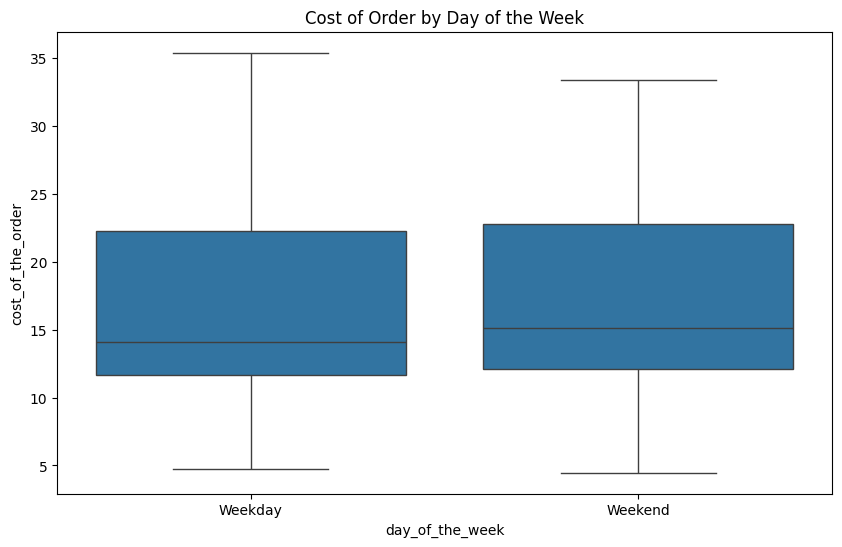

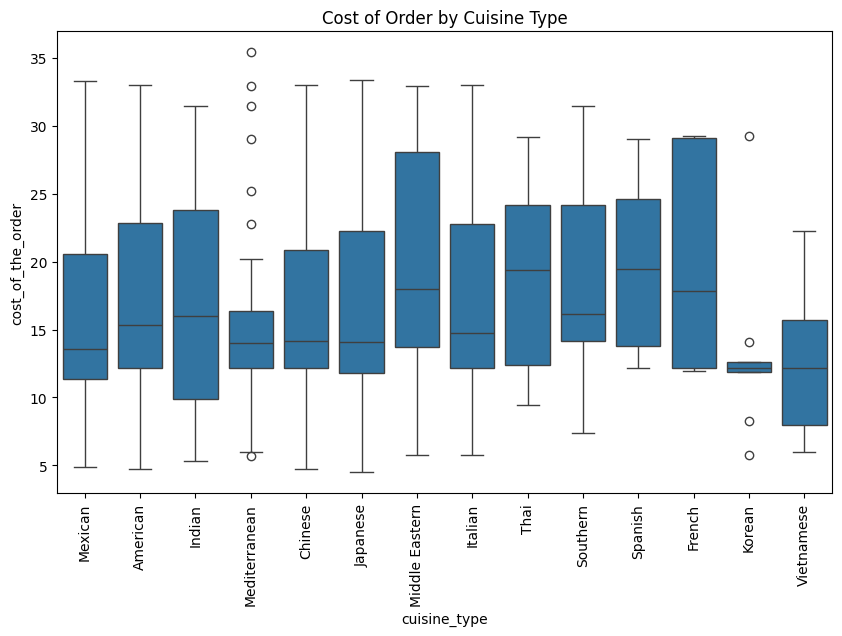

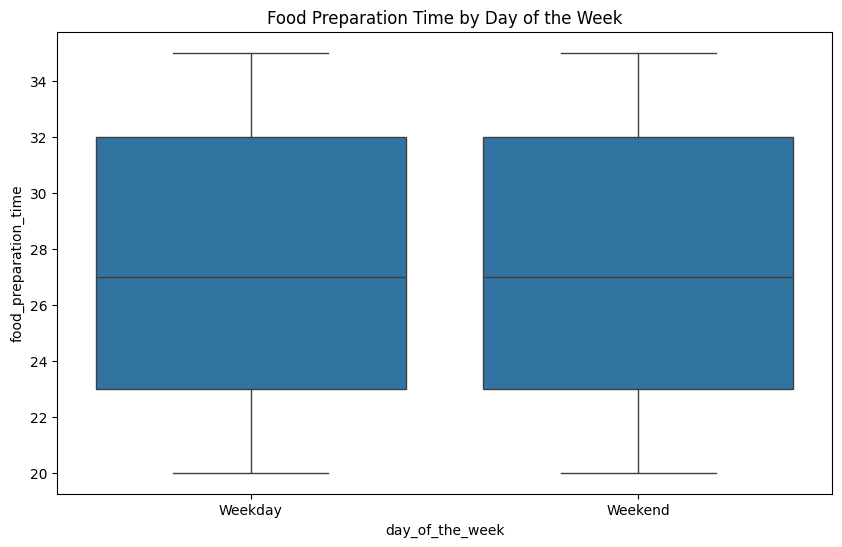

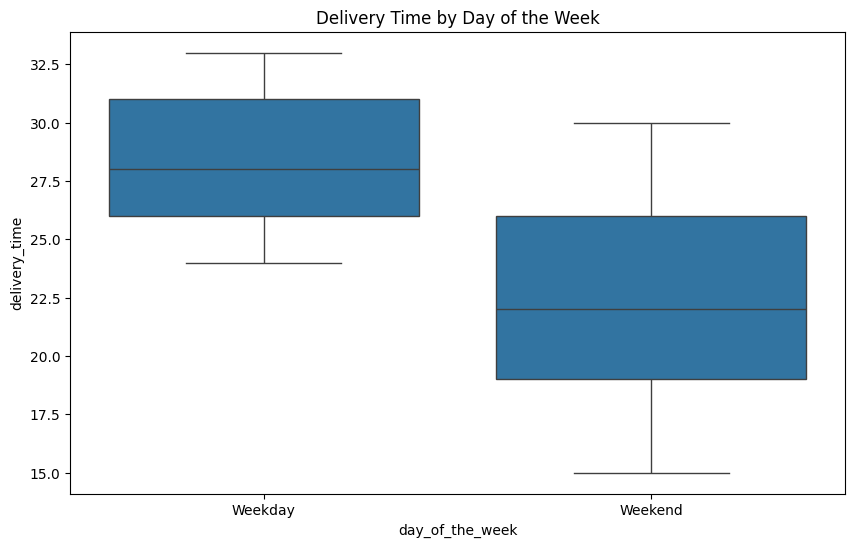

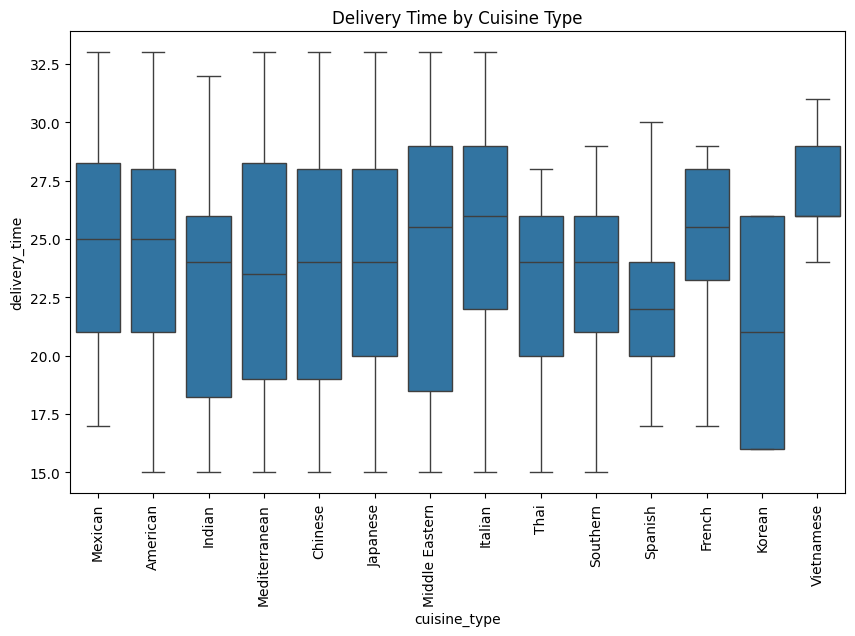

In [29]:
#Boxplots to show the relationship between numerical and categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cost of Order by Cuisine Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Food Preparation Time by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=90)
plt.title('Delivery Time by Cuisine Type')
plt.show()


American and Japanese are relatively the same price point. Delivery time during the week is much higher potentially due to less employees during the week. Food prep time is about the same regardless of week or weekend. Cost of the order is slightly higher during the weekend. Some things to consider: adding more employees during the week to lower delivery time and potentially increase customers.

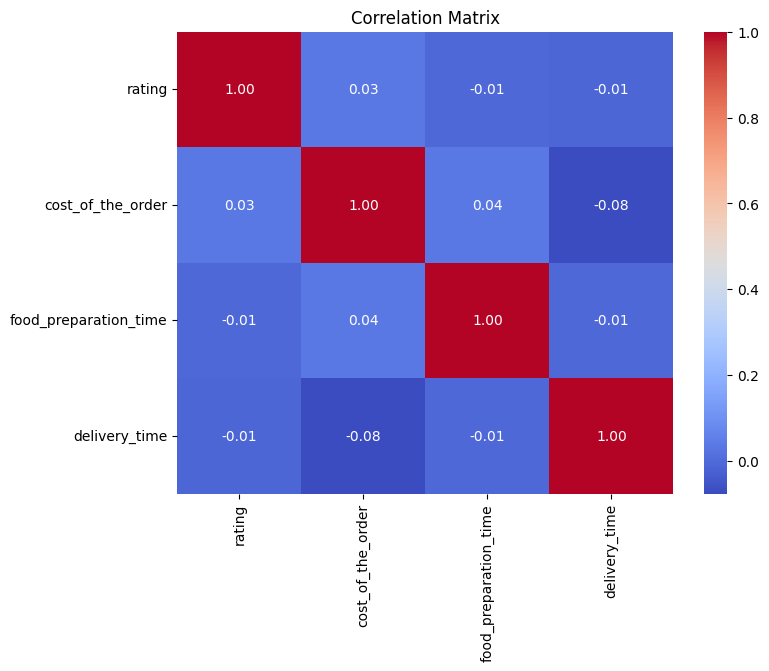

In [30]:
import seaborn as sns
#converting rating column to numeric
df['rating']= pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)

correlation_matrix = df[['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

#plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Above we see the only possible correlation to rating seems to be cost of order. Cost of order is most influenced by food prep time. Something to consider is including more American and Japanese fast food restaurants.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [31]:
#Grouping the data by restaurant name
restaurant_groups = df.groupby('restaurant_name')

#Filtering restaurants based on the given criteria
promotional_restaurants = restaurant_groups.filter(lambda x: len(x) > 50 and x['rating'].mean() > 4)

#Printing the restaurants that meet the criteria
print(promotional_restaurants['restaurant_name'].unique())


['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [32]:
#Calculating revenue for orders over $20
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

#Calculating revenue for orders over $5 but not over $20
revenue_over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

#Calculating total revenue
total_revenue = revenue_over_20 + revenue_over_5

#Printing the total revenue
print(f"The net revenue generated by the company is: ${total_revenue:.2f}")


The net revenue generated by the company is: $3865.57


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [33]:
#Calculating total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

#Calculating the percentage of orders taking more than 60 minutes
percentage_over_60 = (len(df[df['total_delivery_time'] > 60]) / len(df)) * 100

#Printing the result
print(f"{percentage_over_60:.2f}% of orders take more than 60 minutes to be delivered.")


10.24% of orders take more than 60 minutes to be delivered.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [40]:
#grouping data by 'day_of_the_week' and calculating the mean delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
#percent difference
percent_difference = ((mean_delivery_time_by_day['Weekend'] - mean_delivery_time_by_day['Weekday']) / mean_delivery_time_by_day['Weekday']) * 100

#printing the result
print(mean_delivery_time_by_day)
print(f"percent difference:{percent_difference:.2f}%")

day_of_the_week
Weekday    28.305882
Weekend    22.436740
Name: delivery_time, dtype: float64
percent difference:-20.73%


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  Top restaurant cuisines: American and Japanese
* Top time to order: weekends
* Net revenue: $3,665.57

### Recommendations:

*  Consider adding more fast food restaurants, as the highest correlation value is between ratings and delivery time.
* Some restaurants are generating as little as $11,  reconsider the cuisines types available.
* Consider adding more delivery men during the week, as there's a 20% increase in delivery time during the week which could lead to a decrease in orders during the week.

In [46]:
#Calculating net revenue for American cuisine
american_revenue_over_20 = df[(df['cuisine_type'] == 'American') & (df['cost_of_the_order'] > 20)]['cost_of_the_order'].sum() * 0.25
american_revenue_over_5 = df[(df['cuisine_type'] == 'American') & (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
american_total_revenue = american_revenue_over_20 + american_revenue_over_5

#Calculating net revenue for Japanese cuisine
japanese_revenue_over_20 = df[(df['cuisine_type'] == 'Japanese') & (df['cost_of_the_order'] > 20)]['cost_of_the_order'].sum() * 0.25
japanese_revenue_over_5 = df[(df['cuisine_type'] == 'Japanese') & (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
japanese_total_revenue = japanese_revenue_over_20 + japanese_revenue_over_5

print(f"Net revenue from American cuisine: ${american_total_revenue:.2f}")
print(f"Net revenue from Japanese cuisine: ${japanese_total_revenue:.2f}")


Net revenue from American cuisine: $1237.39
Net revenue from Japanese cuisine: $869.99


In [47]:
# Calculating net revenue for all cuisine types
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
revenue_over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
total_revenue = revenue_over_20 + revenue_over_5

print(f"The net revenue generated by the company is: ${total_revenue:.2f}")

# Calculating net revenue by cuisine type
cuisine_revenue = df.groupby('cuisine_type').apply(lambda x: (x[x['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25) + (x[(x['cost_of_the_order'] > 5) & (x['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15))

print("\nNet Revenue by Cuisine Type:")
cuisine_revenue


The net revenue generated by the company is: $3865.57

Net Revenue by Cuisine Type:


<ipython-input-47-0b392254cbe3>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cuisine_revenue = df.groupby('cuisine_type').apply(lambda x: (x[x['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25) + (x[(x['cost_of_the_order'] > 5) & (x['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15))


,0
cuisine_type,
American,1237.3925
Chinese,416.9260
French,41.8005
Indian,165.5615
Italian,595.1010
Japanese,869.9910
Korean,20.6670
Mediterranean,95.9760
Mexican,151.0370


---